In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('heart_disease.csv')
df.shape

(253680, 22)

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
# 1. Remove duplicates
df_cleaned = df.drop_duplicates()

# 2. Handle outliers in BMI, MentHlth, and PhysHlth (if any extreme values are found)
# Here, we'll set arbitrary thresholds (BMI > 60 or < 10, MentHlth or PhysHlth > 30 is considered outlier)
df_cleaned = df_cleaned[(df_cleaned['BMI'] <= 60) & (df_cleaned['BMI'] >= 10)]
df_cleaned = df_cleaned[(df_cleaned['MentHlth'] <= 30) & (df_cleaned['PhysHlth'] <= 30)]

# 3. Rename columns for consistency
df_cleaned.rename(columns={'HeartDiseaseorAttack': 'HeartDisease', 'HvyAlcoholConsump': 'HeavyAlcohol'}, inplace=True)

# 4. (Optional) Encoding categorical data back from numerical representations (for user interpretability)
# For example, Gender and General Health levels could be mapped to categories

# Check the cleaned dataset
df_cleaned.head()


,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


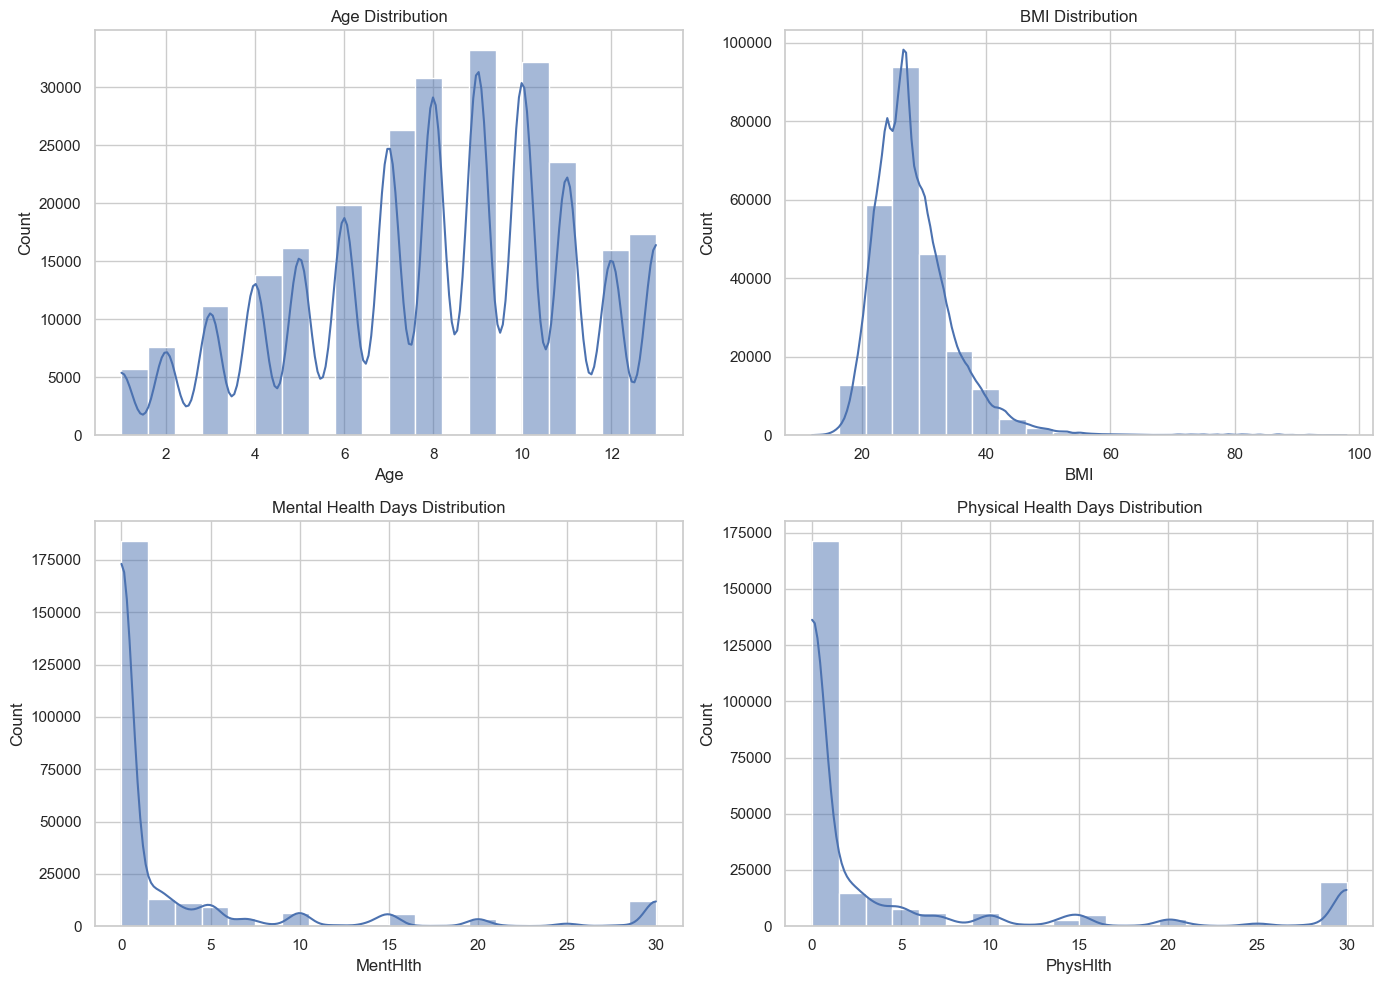

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart_disease.csv'
df = pd.read_csv(file_path)

# Plot histograms for Age, BMI, MentHlth, and PhysHlth
plt.figure(figsize=(14, 10))

# Age
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

# BMI
plt.subplot(2, 2, 2)
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')

# Mental Health Days
plt.subplot(2, 2, 3)
sns.histplot(df['MentHlth'], bins=20, kde=True)
plt.title('Mental Health Days Distribution')

# Physical Health Days
plt.subplot(2, 2, 4)
sns.histplot(df['PhysHlth'], bins=20, kde=True)
plt.title('Physical Health Days Distribution')

plt.tight_layout()
plt.show()

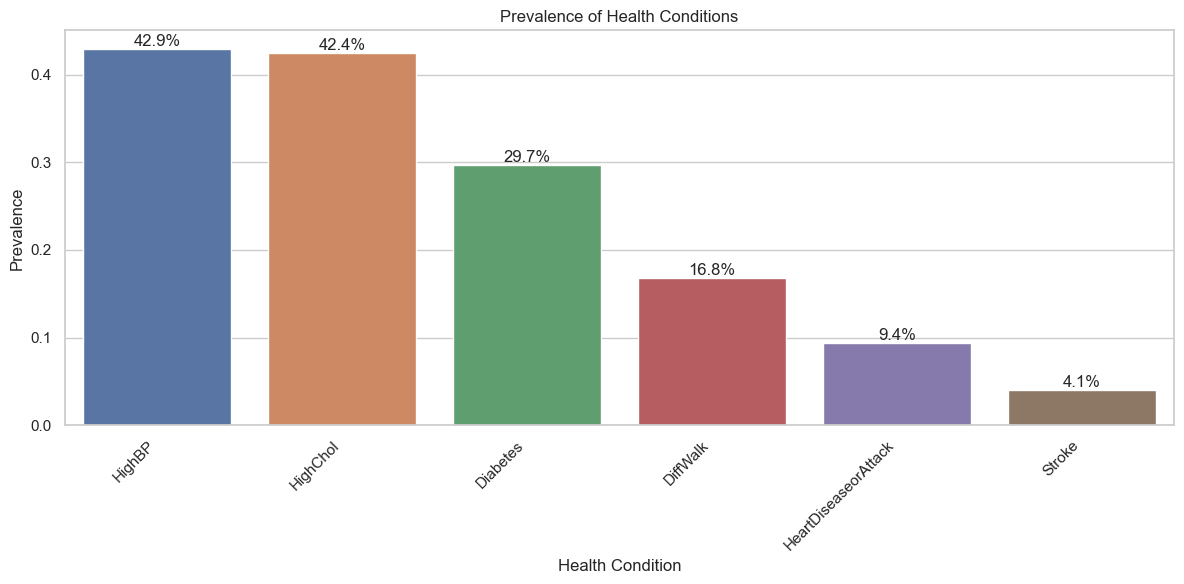

Prevalence of Health Conditions:
HighBP: 42.9%
HighChol: 42.4%
Diabetes: 29.7%
DiffWalk: 16.8%
HeartDiseaseorAttack: 9.4%
Stroke: 4.1%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart_disease.csv'
df = pd.read_csv(file_path)

# List of conditions to plot
conditions = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'Diabetes', 'DiffWalk']

# Calculate prevalence for each condition
prevalence = df[conditions].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=prevalence.index, y=prevalence.values)
plt.title('Prevalence of Health Conditions')
plt.xlabel('Health Condition')
plt.ylabel('Prevalence')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, v in enumerate(prevalence.values):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the prevalence percentages
print("Prevalence of Health Conditions:")
for condition, value in prevalence.items():
    print(f"{condition}: {value:.1%}")

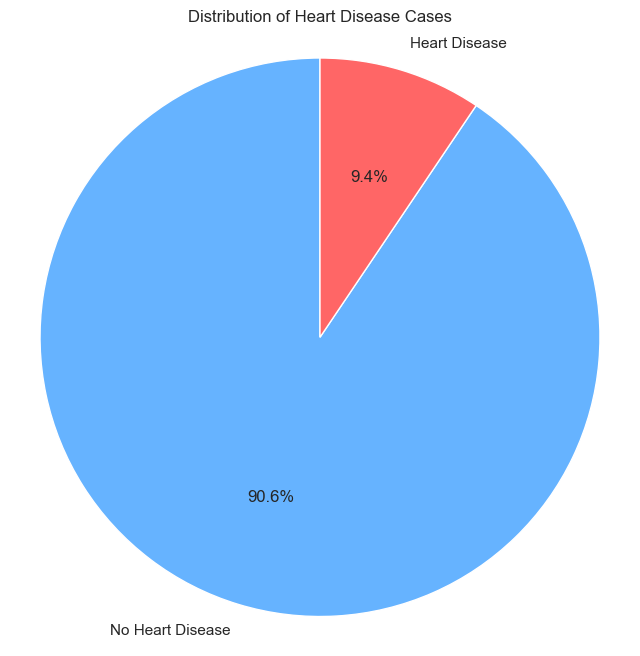

In [9]:
heart_disease_distribution = df['HeartDiseaseorAttack'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_distribution, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Distribution of Heart Disease Cases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

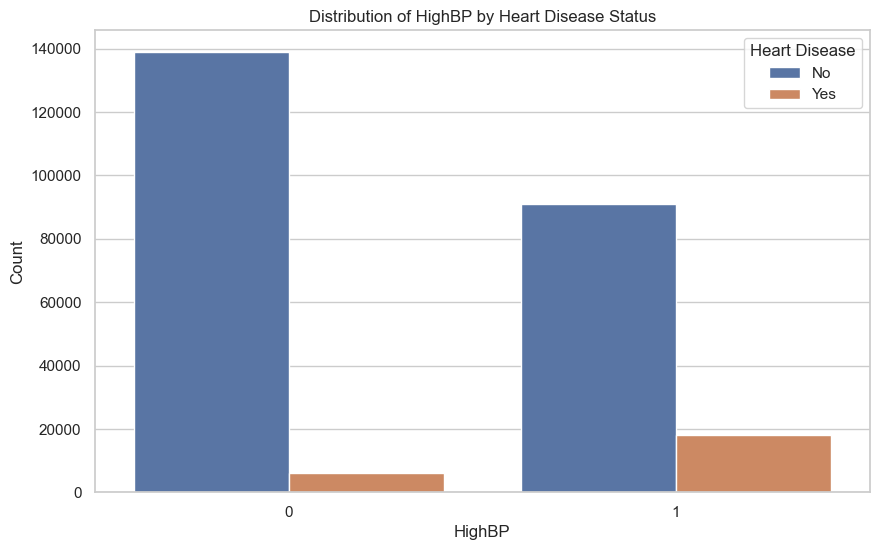

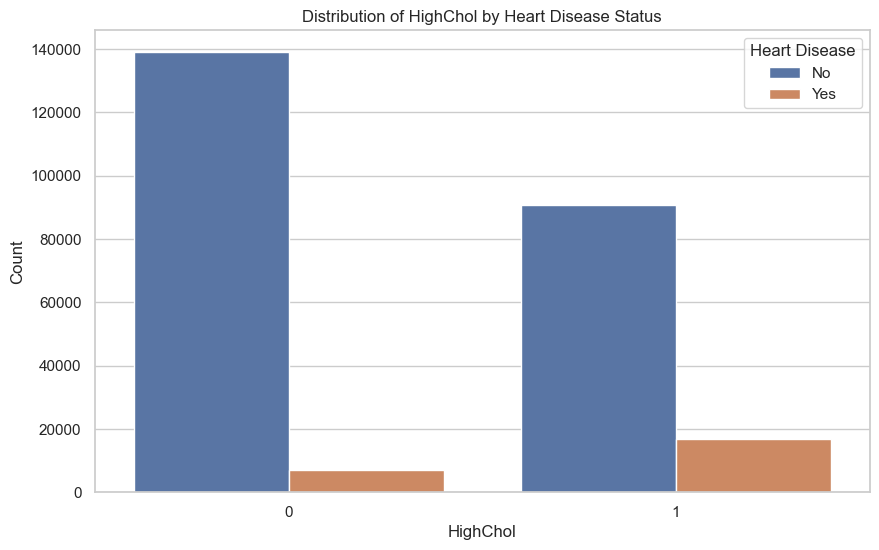

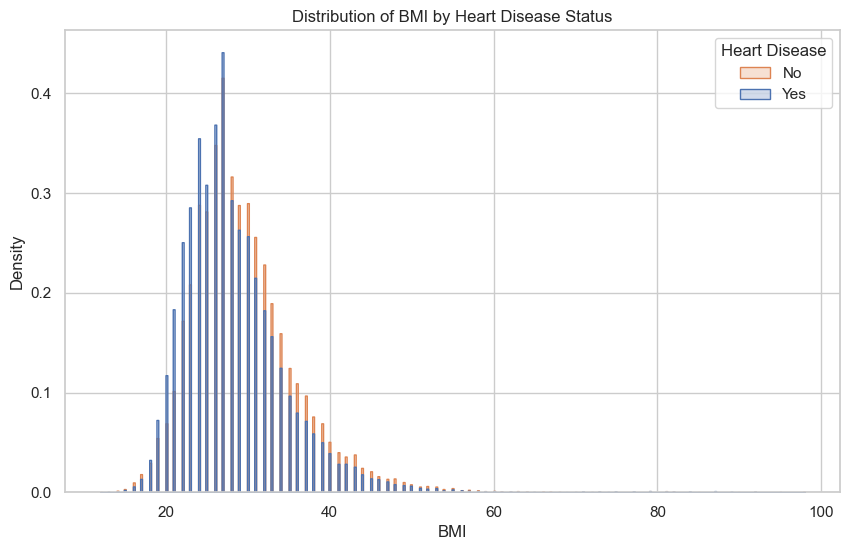

Summary statistics for HighBP:
                         count      mean       std  min  25%  50%  75%  max
HeartDiseaseorAttack                                                       
0                     229787.0  0.395588  0.488978  0.0  0.0  0.0  1.0  1.0
1                      23893.0  0.750345  0.432822  0.0  1.0  1.0  1.0  1.0
Prevalence of HighBP:
HeartDiseaseorAttack
0    0.395588
1    0.750345
Name: HighBP, dtype: float64
Summary statistics for HighChol:
                         count      mean       std  min  25%  50%  75%  max
HeartDiseaseorAttack                                                       
0                     229787.0  0.395314  0.488919  0.0  0.0  0.0  1.0  1.0
1                      23893.0  0.701168  0.457756  0.0  0.0  1.0  1.0  1.0
Prevalence of HighChol:
HeartDiseaseorAttack
0    0.395314
1    0.701168
Name: HighChol, dtype: float64
Summary statistics for BMI:
                         count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAtt

In [10]:
# Create a function to plot side-by-side bar charts for categorical variables
def plot_categorical(variable):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue='HeartDiseaseorAttack', data=df)
    plt.title(f'Distribution of {variable} by Heart Disease Status')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
    plt.show()

# Create a function to plot side-by-side histograms for continuous variables
def plot_continuous(variable):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=variable, hue='HeartDiseaseorAttack', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {variable} by Heart Disease Status')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
    plt.show()

# Plot distributions for HighBP, HighChol, and BMI
plot_categorical('HighBP')
plot_categorical('HighChol')
plot_continuous('BMI')

# Calculate and print some summary statistics
def print_summary(variable):
    summary = df.groupby('HeartDiseaseorAttack')[variable].describe()
    print(f"\
Summary statistics for {variable}:")
    print(summary)
    if variable in ['HighBP', 'HighChol']:
        prevalence = df.groupby('HeartDiseaseorAttack')[variable].mean()
        print(f"\
Prevalence of {variable}:")
        print(prevalence)

print_summary('HighBP')
print_summary('HighChol')
print_summary('BMI')

Available columns:
['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


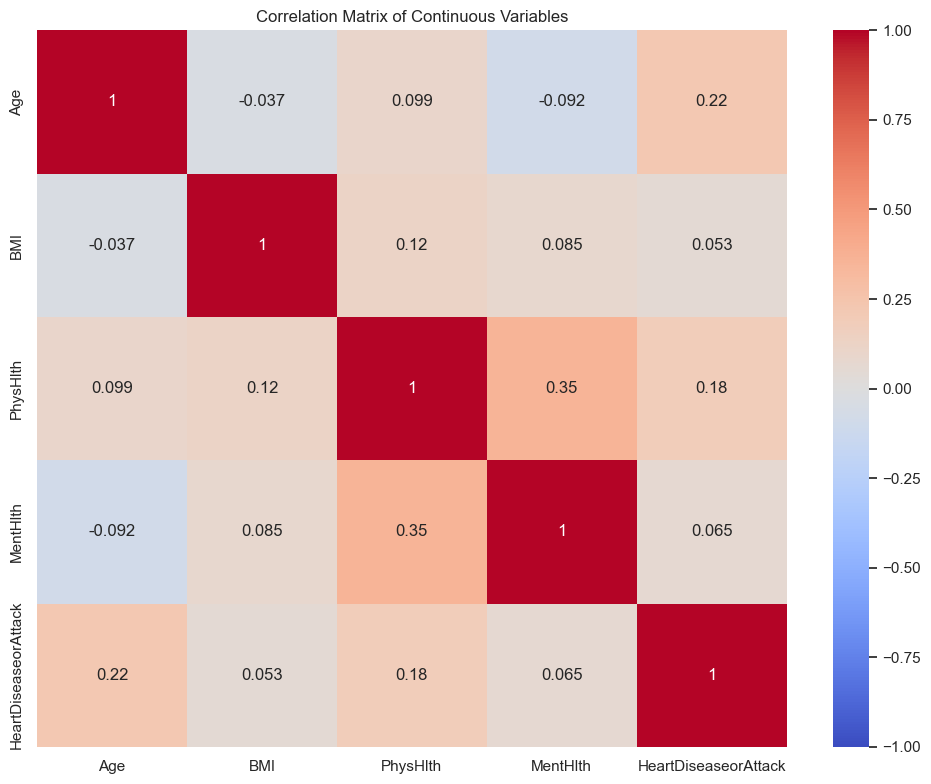

Correlation Matrix:
                           Age       BMI  PhysHlth  MentHlth  \
Age                   1.000000 -0.036618  0.099130 -0.092068   
BMI                  -0.036618  1.000000  0.121141  0.085310   
PhysHlth              0.099130  0.121141  1.000000  0.353619   
MentHlth             -0.092068  0.085310  0.353619  1.000000   
HeartDiseaseorAttack  0.221618  0.052904  0.181698  0.064621   

                      HeartDiseaseorAttack  
Age                               0.221618  
BMI                               0.052904  
PhysHlth                          0.181698  
MentHlth                          0.064621  
HeartDiseaseorAttack              1.000000  
Summary Statistics:
                 Age            BMI       PhysHlth       MentHlth  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        8.032119      28.382364       4.242081       3.184772   
std         3.054220       6.608694       8.717951       7.412847   
min         1.000000      12.

In [11]:
print("Available columns:")
print(df.columns.tolist())

# Select continuous variables (we'll update this list based on the available columns)
continuous_vars = ['Age', 'BMI', 'PhysHlth', 'MentHlth', 'HeartDiseaseorAttack']

# Create correlation matrix
corr_matrix = df[continuous_vars].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Continuous Variables')
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\
Correlation Matrix:")
print(corr_matrix)

# Calculate and print some summary statistics
print("\
Summary Statistics:")
print(df[continuous_vars].describe())

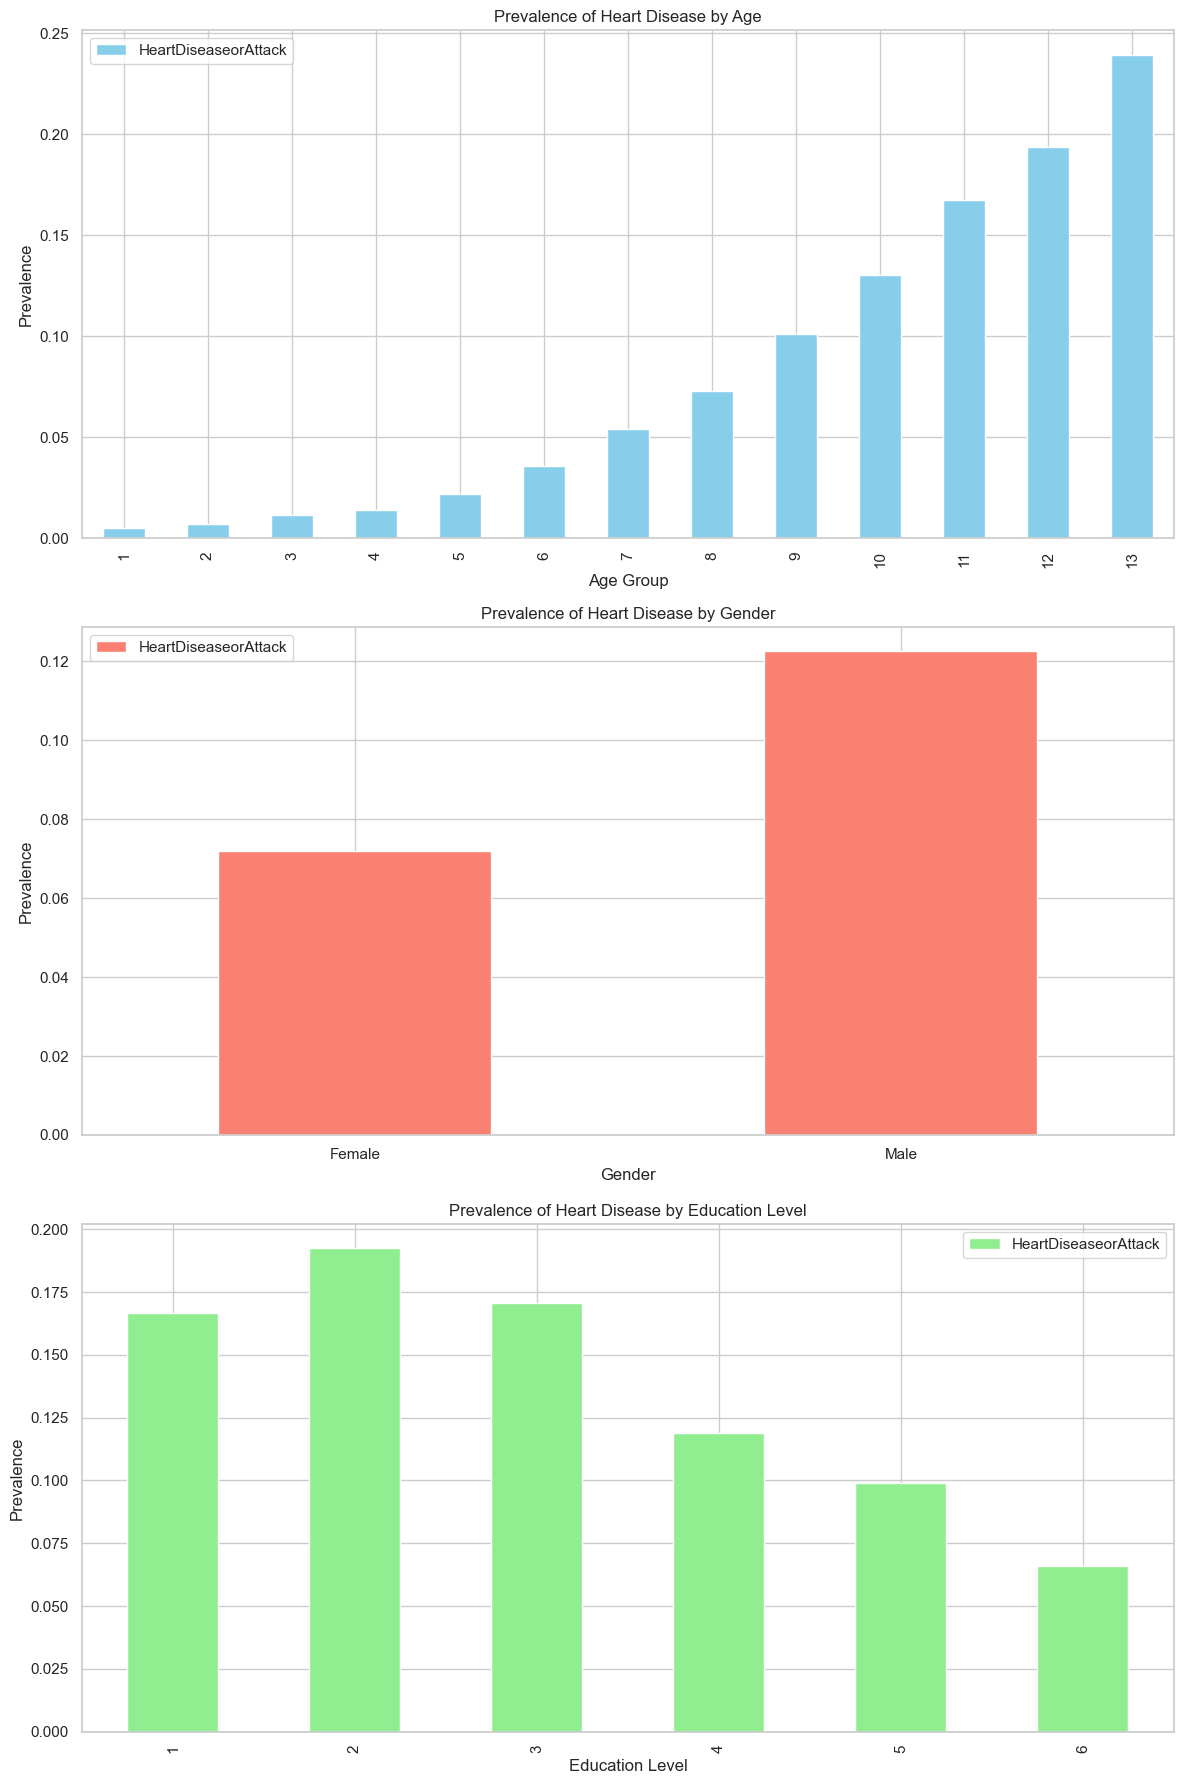

Age Pivot Table:
     HeartDiseaseorAttack
Age                      
1                0.005088
2                0.007107
3                0.011328
4                0.013962
5                0.021724
Gender Pivot Table:
     HeartDiseaseorAttack
Sex                      
0                0.071879
1                0.122536
Education Pivot Table:
           HeartDiseaseorAttack
Education                      
1                      0.166667
2                      0.192431
3                      0.170711
4                      0.118996
5                      0.098956


In [12]:
 # Create pivot tables for heart disease prevalence by demographic groups
age_pivot = df.pivot_table(values='HeartDiseaseorAttack', index='Age', aggfunc='mean')
gender_pivot = df.pivot_table(values='HeartDiseaseorAttack', index='Sex', aggfunc='mean')
education_pivot = df.pivot_table(values='HeartDiseaseorAttack', index='Education', aggfunc='mean')

# Plot bar charts for each demographic group
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Age
age_pivot.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Prevalence of Heart Disease by Age')
axs[0].set_ylabel('Prevalence')
axs[0].set_xlabel('Age Group')

# Gender
gender_pivot.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Prevalence of Heart Disease by Gender')
axs[1].set_ylabel('Prevalence')
axs[1].set_xlabel('Gender')
axs[1].set_xticklabels(['Female', 'Male'], rotation=0)

# Education
education_pivot.plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title('Prevalence of Heart Disease by Education Level')
axs[2].set_ylabel('Prevalence')
axs[2].set_xlabel('Education Level')

plt.tight_layout()
plt.show()

# Print pivot tables
print("Age Pivot Table:")
print(age_pivot.head())
print("\
Gender Pivot Table:")
print(gender_pivot.head())
print("\
Education Pivot Table:")
print(education_pivot.head())